# KNN 분류예측

* 새 데이터포인터(테스트용 데이터 레코드 1개)의 분류예측을 위해서 <br> 훈련데이터셋에서 가장 가까운 특성을 가진 훈련데이터 포인트를 찾음
* knn 기법으로 도출된 특성이 유사한 훈련데이터의 데이터포인트(레코드)들 간의 <br>클래스 분류 최빈치를 새 데이터포인터의 예측값으로 사용함

## (1) knn 분류예측의 원리

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


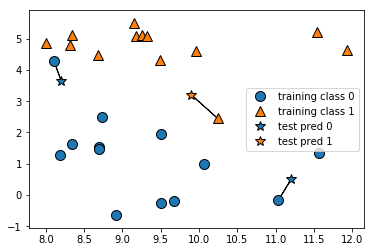

In [2]:
# 최근접 이웃을 1개 설정하는 경우
mglearn.plots.plot_knn_classification(n_neighbors = 1)
# - mglearn의 해당 그래픽 메서드에 디폴트로 들어 있는 그림임
# - 새로운 데이터포인트의 클래스 예측값은 가장 가까운 훈련데이터 이웃의 클래스 타깃값을 그대로 사용함
# - k갯수를 낮출수록 모델이 복잡해지지만, 훈련데이터에만 정확하고, 테스트데이터에는 오차가 많은 과대적합 가능성이 큼

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


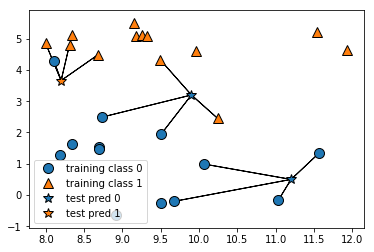

In [3]:
# 최근접 이웃을 여러 개 설정하는 경우
mglearn.plots.plot_knn_classification(n_neighbors = 4)
# - mglearn의 해당 그래픽 메서드에 디폴트로 들어 있는 그림임
# - 새로운 데이터포인트의 분류예측값은 어려 개의 훈련데이터 이웃의 최빈치 클래스를 사용함
# - k갯수를 늘릴수록 모델이 단순해지지만, 
#   훈련모델 자체의 정확도가 낮아서 테스트데이터의 클래스 예측분류시 과소적합 가능성 큼

## (2) knn 회귀예측의 장단점

### k-NN 장점
* 이해하기 쉬운 모델이며, 간단한 매개변수 설정으로 좋은 성능 발휘함
* 복잡한 알고리즘 적용전에 시도해 볼 수 있는 시작모델임

### k-NN 단점
* 훈련세트가 크면(피처갯수, 샘플수) 속도가 느리며, 특히 피처가 수백개 이상인 경우 잘 동작하지 않음
* 피처의 값 대부분이 0인 희소한 데이터셋에서는 잘 작동하지 않음

## (3) knn 회귀예측 주요 파라미터

### metric: 데이터포인트 사이의 거리를 재는 방법
* 유클리디안 거리: 기하학적 최단거리로 거리차이의 제곱을 모두 더함, 기본적으로 여러환경에서 잘 작동함 
* 맨하튼 거리: 거리차이의 절대값을 모두 더함
* 마할라노비스 거리: 데이터의 분포에서 개별 데이터포인트가 얼마나 떨어져 있나를 계산

### n_neighbors: 최근접 이웃갯수
* k갯수를 낮출수록 모델이 복잡해지지만, 훈련데이터에만 정확하고, 테스트데이터에는 오차가 많은 과대적합 가능성이 큼
* k갯수를 늘릴수록 모델이 단순해지지만, 훈련모델 자체의 정확도가 낮아서 테스트데이터의 예측값도 오차가 많은 과소적합 가능성 큼

# sklearn(사이킷런) 예제데이터셋: <font color = red>iris</font> (분류예측)

## (1) sklearn(사이킷런) 패키지 중 <font color = blue>예제데이터셋 모듈</font>을 로딩

In [4]:
# sklearn(사이킷런) 패키지에 속한 모듈중에서 datasets 모듈만 메모리로 로딩
from sklearn import datasets 
# - from sklearn import datasets as skd처럼 별칭을 사용해서 로딩한다면,
#   이후 과정은 datasets 대신에 skd로 사용해야 함

In [5]:
# (실행하지 말고 탭키만 눌러보기) datasets 모듈에 속한 메서드 확인 방법
datasets. 
# - 점(.)다음에 탭키를 눌러보자
# - datasets모듈에 속한 다양한 메서드 중에서 
#   load_OOO이라는 메서드를 이용해 예제데이터셋을 로딩할 수 있음

SyntaxError: invalid syntax (<ipython-input-5-e5c117e6a662>, line 2)

In [ ]:
# datasets 모듈에 속한 iris 데이터셋 로딩
iris = datasets.load_iris()
iris
# - iris 데이터내용과 관련 도움말 정보가 같이 들어 있음

## (2) sklearn(사이킷런) 패키지의 모듈(함수) 중 <font color = blue>특정 데이터셋 메서드</font>를 로딩

In [ ]:
# sklearn(사이킷런) 패키지의 datasets 모듈에 속한 특정 메서드(함수)를 메모리로 로딩
from sklearn.datasets import load_iris
# - 메서드에 대해서는 보통 별칭으로 로딩하지 않음

In [ ]:
# load_iris()메서드를 사용해 iris 데이터셋 바로 로딩
iris = load_iris()
iris
# - iris 데이터내용과 관련 도움말 정보가 같이 들어 있음

# iris(붓꽃) 데이터 탐색

<img src = "./../images/iris.png"> <img src = "./../images/iris_info.png">

## (1) iris 데이터셋 객체유형

In [ ]:
# iris 데이터셋 자료형 조회
type(iris)
# - iris 객체의 자료형은 사아킷런의 고유한 객체중의 하나인 Bunch객체로
#   파이썬 딕셔너리와 비슷한 형식으로 키(key)와 값(value)로 구성되어 있음 

In [ ]:
# iris 데이터셋에 있는 주요 정보항목(key) 조회
iris.keys()

# - 사이킷런의 Bunch자료형에서는 각 키(key)별로 
#   예측(독립)과 반응(종속)변수 데이터내용과 관련 도움말 정보가 같이 들어 있음

In [ ]:
# iris 데이터셋의 실제 물리적인 파일의 위치
print(type(iris.filename)) 
# - 일반 문자열형식임

iris.filename # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['filename'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함

## (2) iris 데이터셋 설명(코딩북)

In [ ]:
# iris 데이터셋에 대한 전반적인 설명조회

print(type(iris.DESCR))
# - 일반 문자열형식임

iris.DESCR # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['DESCR'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함
# - 엔터기 표시를 의미하는 \n을 일반 문자로 인식해 출력하다 보니 알아보기 힘듦

In [ ]:
print(iris.DESCR) # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
print(iris['DESCR']) # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함

# - 엔터기 표시를 의미하는 \n을 정규표현식으로 인식하므로 
#   줄바꿈이 적절히 반영되어 출력되면서 알아보기가 좋음

## (3) iris 데이터셋 예측(독립)변수: 피처(feature)

In [ ]:
# 예측(독립)변수명: 피처네임
print(type(iris.feature_names)) 
# - 넘파이 1차원 배열형식이며, 
#   복수의 문자형 요소들이 리스트형식으로 들어 있음

print(len(iris.feature_names))
# - 갯수 파악

iris.feature_names # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['feature_names'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함

In [ ]:
# 예측(독립)변수 데이터 조회
print(type(iris.data))
# - 넘파이 2차원 배열형식이며, 
#   복수의 숫자형 요소들이 리스트형식으로 들어 있음

print(iris.data.shape) 
# 갯수 파악

iris.data # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['data'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함

## (4) iris 데이터셋 반응(종속)변수: 타겟(target)

In [ ]:
# 반응(종속)변수에 속한 레이블(label), 클래스(class): 타겟네임 
print(type(iris.target_names)) 
# - 넘파이 1차원 배열형식이며, 
#   복수의 문자형 요소들이 리스트형식으로 들어 있음

print(iris.target_names.shape)
# - 갯수 파악

iris.target_names # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['target_names'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함
# - 붓꽃의 종류별 이름이 setosa, versicolor, virginical 순으로 나타나
#   target_names의 정수 0, 1, 2의 순서와 매칭되어 있음

In [ ]:
# 반응(종속)변수 데이터 조회
print(type(iris.target))
# - 넘파이 1차원 배열형식이며, 
#   복수의 숫자형 요소들이 리스트형식으로 들어 있음

print(iris.data.shape) 
# 갯수 파악

iris.target # iris에 속한 키(key)를 하나의 속성개념으로 인식해 호출함
iris['target'] # iris에 속한 키(key)를 하나의 인덱싱으로 인식해 호출함
# - 붓꽃의 종류가 0, 1, 2의 3가지 정수로 측정되어 있음

## (5) iris 데이터셋 반응(종속)변수: 클래스별 분포

#### (참고) 파이썬 내장함수 zip

In [ ]:
print(list(zip([1, 2, 3], [4, 5, 6])))
print(list(zip("abc", "def")))
print(list(zip([1, 2, 3], [4, 5, 6], ["abc", "def", "ghi"])))

In [ ]:
print(tuple(zip([1, 2, 3], [4, 5, 6])))
print(tuple(zip("abc", "def", "ghi")))
print(tuple(zip([1, 2, 3], [4, 5, 6], ["abc", "def", "ghi"])))

In [ ]:
{k: v for k, v in zip(["abc", "def", "ghi"], [33, 44, 55])}

#### 반응(종속)변수 클래스별 빈도수

In [ ]:
# 반응(종속)변수 클래스별 빈도수
import numpy as np

print(iris.target_names) # 반응(종속)변수 클래스 유형
print(np.bincount(iris.target)) # 반응(종속)변수 클래스 빈도수

iris_bincount = {k: v for k, v in zip(iris.target_names, np.bincount(iris.target))}
iris_bincount
# - 클래스 유형별 빈도수 같이 출력

In [ ]:
print(type(iris_bincount))
print(iris_bincount.keys())
print(iris_bincount.values())
print(iris_bincount.items())

#### 반응(종속)변수 클래스별 비율

In [ ]:
for k, v in iris_bincount.items(): 
    pct = v / sum(iris_bincount.values()) 
    print("%s %0.3f" % (k, pct)) # 기본 문자열 포맷팅

In [ ]:
for k, v in iris_bincount.items(): 
    pct = v / sum(iris_bincount.values()) 
    print("{} {:.3f}".format(k, pct)) # format()메서드를 이용한 포맷팅

In [ ]:
for k, v in iris_bincount.items(): 
    pct = v / sum(iris_bincount.values()) 
    print(f"{k} {pct:.3f}") # f문자열 포매팅 방법

# 데이터 분할

#### (참고) 파이썬에서 변수할당 방법

In [ ]:
# 대상변수 하나에 해당 요소값을 각각 할당하는 방식
a = 3
b = 4 

In [ ]:
# 대상변수 여러 개에 요소값을 동시에 할당하는 방식
a, b = 3, 4
# - 괄호(튜플방식)이나 대괄호(리스트방식)가 없어도 됨

# 튜플 방식도 가능
(a, b) = (3, 4)
(a, b) = 3, 4
a, b = (3, 4)

# 리스트 방식도 가능
[a, b] = [3, 4]
[a, b] = 3, 4
a, b = [3, 4]

## (1) 데이터분할 내용을 1개 객체에 요소별로 할당하는 방식

In [ ]:
# 데이터분할 메서드 로딩
from sklearn.model_selection import train_test_split
# - sklearn 패키지(라이브러리)의 model_selection 모듈 중에서
#   train_test_split()이라는 메서드(함수)를 메모로리로 로딩함

In [ ]:
# 데이터분할 메서드를 활용해 데이터분할 실시
iris_split = train_test_split(iris['data'], iris['target'], random_state = 0)
# - 분할된 데이터셋을 하나의 객체에 한꺼번에 저장해 놓음

print(type(iris_split)) 
# - 객체유형은 리스트임

print(len(iris_split)) 
# - 분할된 리스트객체에 4개 요소로 구성됨

iris_split
# - 분할된 내용은 리스트객체이며, 4가지 요소별로 
# 배열형식으로 데이터분할이 되었음을 알 수 있음 

In [ ]:
# 4개 리스트 요소를 세부 데이터셋으로 할당
X_train = iris_split[0] # 예측(독립)변수의 훈련용 데이터셋
X_test = iris_split[1] # 예측(독립)변수의 테스트용 데이터셋

y_train = iris_split[2] # 반응(종속)변수의 훈련용 데이터셋
y_test = iris_split[3] # 반응(종속)변수의 테스트용 데이터셋

In [ ]:
# 데이터셋별 객체유형과 규모

print('예측(독립)변수 전체 데이터셋 객체유형:', type(iris['data']))
print('예측(독립)변수 전체 데이터셋 전체규모:', iris['data'].shape)

print()

print('예측(독립)변수의 훈련용 데이터셋 객체유형:', type(X_train))
print('예측(독립)변수의 훈련용 데이터셋 객체규모:', X_train.shape) 
print('예측(독립)변수의 테스트용 데이터셋 객체유형:', type(X_test))
print('예측(독립)변수의 테스트용 데이터셋 객체규모:', X_test.shape) 

print()

print('반응(종속)변수의 훈련용 데이터셋 객체유형:', type(y_train))
print('반응(종속)변수의 훈련용 데이터셋 객체규모:', y_train.shape) 
print('반응(종속)변수의 테스트용 데이터셋 객체유형:', type(y_test))
print('반응(종속)변수의 테스트용 데이터셋 객체규모:', y_test.shape) 

## (2) 데이터분할 내용을  여러개 객체에 나누어 각각 할당하는 방식

* 예측(입력, 투입, 설명, 독립)변수는 여러 개로 구성된 2차원 배열(행렬)이므로 대문자 X로 보통 표현함
* 반응(결과, 기대, 종속)변수는 한 개로 구성된 1차원 배열(벡터)이므로 소문자 y로 보통 표현함

In [ ]:
# 데이터분할 메서드 로딩
from sklearn.model_selection import train_test_split
# - sklearn 패키지(라이브러리)의 model_selection 모듈 중에서
#   train_test_split()이라는 메서드(함수)를 메모로리로 로딩함

In [ ]:
# 데이터분할 실시
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state = 0)
# - 분할된 데이터셋을 각각의 객체에 별도로 저장해 놓음

# - train_test_split() 메서드는 Numpy 배열형식의 4개 반환값을 생성함
# - 기본적으로 train은 75%, test는 25% 데이터셋을 할당받는데,
#   test_size 매개변수를 통해 테스트셋의 비율을 지정할 수 있음
# - random.state 매개변수를 통해 샘플의 재현성을 확보함

In [ ]:
type(X_train)

In [ ]:
# 데이터셋별 객체유형과 규모

print('예측(독립)변수 전체 데이터셋 객체유형:', type(iris['data']))
print('예측(독립)변수 전체 데이터셋 전체규모:', iris['data'].shape)

print()

print('예측(독립)변수의 훈련용 데이터셋 객체유형:', type(X_train))
print('예측(독립)변수의 훈련용 데이터셋 객체규모:', X_train.shape) 
print('예측(독립)변수의 테스트용 데이터셋 객체유형:', type(X_test))
print('예측(독립)변수의 테스트용 데이터셋 객체규모:', X_test.shape) 

print()

print('반응(종속)변수의 훈련용 데이터셋 객체유형:', type(y_train))
print('반응(종속)변수의 훈련용 데이터셋 객체규모:', y_train.shape) 
print('반응(종속)변수의 테스트용 데이터셋 객체유형:', type(y_test))
print('반응(종속)변수의 테스트용 데이터셋 객체규모:', y_test.shape) 

# 데이터 탐색

## (1) 기술통계분석을 통한 데이터탐색

In [ ]:
# 판다스 패키지(라이브러리)를 pd라는 별칭으로 통째로 로딩함
import pandas as pd

# 훈련용 예측(독립)변수셋을 데이터프레임 형식으로 변경
X_train_df = pd.DataFrame(X_train, columns = iris.feature_names)

In [ ]:
# 훈련용 데이터셋 구조파악
X_train_df.info()

In [ ]:
# 훈련용 데이터셋 기술통계분석
X_train_df.describe()

In [ ]:
# 판다스 데이터프레임 조회
X_train_df.loc[0:5, ['sepal length (cm)', 'petal length (cm)']]

In [ ]:
# 판다스 데이터프레임 조회
X_train_df.iloc[:, 0:3].head()

## (2) 그래프를 통한 데이터탐색

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
# seaborn(씨본) 패키지 산점도플롯(pairplot)
fig = sb.pairplot(X_train_df)

In [ ]:
# seaborn(씨본) 패키지 산점도그리드플롯(PairGrid)
pg = sb.PairGrid(X_train_df) 
pg = pg.map_upper(sb.regplot) 
pg = pg.map_lower(sb.kdeplot) 
pg = pg.map_diag(sb.distplot, rug = True) 

In [ ]:
# Pandas(판다스) 패키지 산점도플롯(plotting.scatter_matrix)
import pandas as pd
import mglearn

In [ ]:
pd.plotting.scatter_matrix(X_train_df, c = y_train, figsize = (15, 15), marker='o',
                           hist_kwds = {'bins':20}, s = 60, alpha = 0.8, cmap = mglearn.cm3)

# KNN 분류예측

* 새 데이터포인터(테스트용 데이터 레코드 1개)의 클래스유형 분류예측을 위해서 <br> 훈련데이터셋에서 가장 가까운 특성을 가진 혼련데이터 포인트를 찾음
* knn 기법으로 도출된 특성이 유사한 훈련데이터의 데이터포인트(레코드) 중에서 <br>빈도수가 가장 높은 클래스를 새 데이터포인터의 예측값으로 사용함

## (1) sklearn 패키지의 knn 모듈 로딩방법

#### sklearn(사이킷런) 패키지(라이브러리) 통째로 로딩

In [ ]:
# sklearn(사이킷런) 패키지(라이브러리)를 sk라는 별칭으로 로딩
import sklearn as sk

In [ ]:
# (실행하지 말고 탭키만 눌러보기) 사이킷런 패키지에 속한 모듈-메서드 확인방법
sk. # 탭키를 눌러 sk 패키지에 속한 모듈 확인이 가능함
sk.neighbors. # 탭키를 눌러 sk 패키지의 neighbors 모듈에 속한 메서드 확인이 가능함
sk.neighbors.KNeighborsClassifier # sk 패키지의 neighbors 모듈에 속한 KNN분류예측 메서드 사용

In [ ]:
# knn 분류객체 생성
knn = sk.neighbors.KNeighborsClassifier(n_neighbors = 1)
print(type(knn))
knn

#### sklearn(사이킷런) 패키지의 knn 모듈만을 로딩

In [ ]:
# sklearn 패키지의 neighbors 모듈을 skn라는 별칭으로 로딩
import sklearn.neighbors as skn

In [ ]:
# (실행하지 말고 탭키만 눌러보기) 사이킷런 패키지에 속한 모듈-메서드 확인방법
skn. # 탭키를 눌러 sk패키지의 neighbors 모듈에 속한 메서드 확인이 가능함
skn.KNeighborsClassifier

In [ ]:
# knn 분류객체 생성
knn = skn.KNeighborsClassifier(n_neighbors = 1)
print(type(knn))
knn

#### sklearn(사이킷런) 패키지의 knn 모듈 중 knn 분류예측 메서드만을 로딩

In [ ]:
# sklearn 패키지의 neighbors 모듈 중 knn 분류예측 메서드만을 직접로딩
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# knn 분류객체 생성
knn = KNeighborsClassifier(n_neighbors = 1)
print(type(knn))
knn

## (2) 훈련모델 피팅

In [ ]:
# 훈련용 데이터셋을 knn객체에 피팅
knn.fit(X_train, y_train)
# - knn 알고리즘이 들어 있는 분류객체에 훈련데이터셋을 피팅해 예측모델을 생성함

#### (참고) 분류객체생성과 훈련모델 피팅을 동시에 하기

In [ ]:
# knn 분류객체 생성과 동시에 훈련데이터셋을 같이 피팅하기
knn.fit = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
print(type(knn))
knn

# 앞에서 별도로 실행한 다음 2개 구문을 한 문장으로 실행하는 개념임
# - 객체생성 코드: knn = KNeighborsClassifier(n_neighbors = 1)
# - 훈련데이터 피팅 코드: knn.fit(X_train, y_train)

## (3) 예측모델 평가

#### 테스트셋을 활용한 예측결과 도출

In [ ]:
# knn 객체에 테스트데이터를 피팅해 훈련모델의 성능을 평가함
y_pred = knn.predict(X_test)

In [ ]:
print('훈련모델의 테스트셋 예측결과: \n', y_pred)
print()
print('실제 테스트셋의 반응(종속)변수내용: \n', y_test)
print()
print('예측결과 정확도 비교: \n', y_pred == y_test)

#### 예측모델 정확도 평가

In [ ]:
# 기본 문자열 포맷팅
print('예측모델 정확도: %0.3f' % np.mean(y_pred == y_test))
print('예측모델 정확도: %0.3f' % knn.score(X_test, y_test))

# .format()메서드 포맷팅
print('예측모델 정확도: {:.3f}'.format(np.mean(y_pred == y_test)))
print('예측모델 정확도: {:.3f}'.format(knn.score(X_test, y_test)))

# f문자열 포맷팅
print(f'예측모델 정확도: {np.mean(y_pred == y_test):.3f}')
print(f'예측모델 정확도: {knn.score(X_test, y_test):.3f}')

## (4) 요약: 분류예측 방법

#### 데이터셋 준비

In [ ]:
# sklearn(사이킷런) 패키지의 datasets 모듈에 속한 특정 메서드(함수)를 메모리로 로딩
from sklearn.datasets import load_iris

# load_iris()메서드를 사용해 iris 데이터셋 바로 로딩
iris = load_iris()

#### 데이터셋 분할

In [ ]:
# 데이터분할 메서드 로딩
from sklearn.model_selection import train_test_split
# - sklearn의 model_selection 모듈 중에서
#   train_test_split()이라는 메서드(함수)를 메모로리로 로딩함

# 데이터분할 실시
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], iris['target'], random_state = 0)
# - 분할된 데이터셋을 각각의 객체에 별도로 저장해 놓음

#### 분류객체 생성

In [ ]:
# sklearn의 neighbors 모듈 중 knn 분류예측 메서드만을 직접로딩
from sklearn.neighbors import KNeighborsClassifier

# knn 분류객체 생성
knn = skn.KNeighborsClassifier(n_neighbors = 1)

#### 훈련모델 피팅

In [ ]:
# 훈련용 데이터셋을 knn객체에 피팅
knn.fit(X_train, y_train)
# - knn 알고리즘이 들어 있는 분류객체에 훈련데이터셋을 피팅해 예측모델을 생성함

#### 예측모델 성능평가

In [ ]:
# knn 객체에 테스트데이터를 피팅해 훈련모델의 성능을 평가함
y_pred = knn.predict(X_test)

print('예측모델 정확도: %0.3f' % knn.score(X_test, y_test))
print('예측모델 정확도: {:0.3f}'.format(knn.score(X_test, y_test)))
print(f'예측모델 정확도: {knn.score(X_test, y_test):0.3f}')

## (5) 평가된 예측모델을 이용한 새로운 예측실시

#### 새로운 데이터셋 1개 생성

In [ ]:
# numpy 패키지를 이용해 배열형식으로 테스트용 데이터셋 생성
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])

print(type(X_new))
print(X_new)

#### 예측실시

In [ ]:
prediction = knn.predict(X_new)
print('클래스 예측결과:', prediction)
print('레이블 예측결과:', iris['target_names'][prediction])

# End of Source